# Machine Learning - Supervised Learning - Dataset 1

## 1. Import Modules

In [3]:
# Basic Modules
import numpy as np
import matplotlib.pyplot as plt
import time

# Data Related Modules
import pandas as pd

# Data Processing
from sklearn.preprocessing import LabelEncoder

# Data Processing - Splitting Test / Train Data
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# MLP Neural Network
from sklearn.neural_network import MLPClassifier

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# SVM
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Validating the Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# Optimization
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## 2. Import Data

In [4]:
# Grab the data and convert csv to pandas dataframe.
cancer_df = pd.read_csv("wdbc.csv")
cancer_df.head()

,idnumber,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,...,radiusworst,textureworst,perimeterworst,areaworst,smoothnessworst,compactnessworst,concavityworst,concavepointsworst,symmetryworst,fractaldimensionworst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# See how many columns and row is in the dataframe
cancer_df.shape

(569, 32)

In [6]:
# See the column names
cancer_df.keys()

Index(['idnumber', 'diagnosis', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity', 'concavepoints', 'symmetry',
       'fractaldimension', 'radiusse', 'texturese', 'perimeterse', 'arease',
       'smoothnessse', 'compactnessse', 'concavityse', 'concavepointsse',
       'symmetryse', 'fractaldimensionse', 'radiusworst', 'textureworst',
       'perimeterworst', 'areaworst', 'smoothnessworst', 'compactnessworst',
       'concavityworst', 'concavepointsworst', 'symmetryworst',
       'fractaldimensionworst'],
      dtype='object')

In [7]:
# Remove unnecessary columns for the better dataframe. (Diagnosis in this case will be considered as a target (y))
X = cancer_df.drop(['idnumber','diagnosis'], axis=1)
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,symmetry,fractaldimension,...,radiusworst,textureworst,perimeterworst,areaworst,smoothnessworst,compactnessworst,concavityworst,concavepointsworst,symmetryworst,fractaldimensionworst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Set diagnosis  as a target(y) and transform the letters into integer value
y = cancer_df.diagnosis
y = LabelEncoder().fit_transform(y)

# There are 357 benign and 212 malignant cases  in the database
np.bincount(y)

array([357, 212], dtype=int64)

In [9]:
# Split between the test and train dataset. test size will be 40% of the whole dataset, use the random seed 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

## 3. Decision Tree

In [10]:
# Construct the tree model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [11]:
# Predict with verification data
y_pred = decision_tree.predict(X_test)

In [12]:
# Confusion matrix qualification
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],177,2
True[1],19,87


In [13]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       179
           1       0.98      0.82      0.89       106

    accuracy                           0.93       285
   macro avg       0.94      0.90      0.92       285
weighted avg       0.93      0.93      0.92       285



In [14]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 21
Accuracy: 0.926
Precision: 0.978
Recall: 0.821
F1: 0.892


In [15]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])

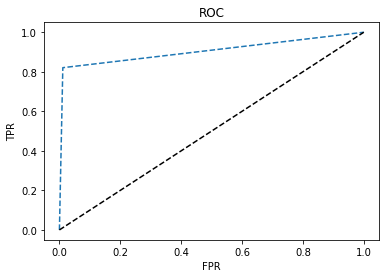

In [16]:
# Graph ROC curve based on f1 score
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [17]:
# Cross Validation
scores = cross_validate(estimator=decision_tree, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.894 +/- 0.011


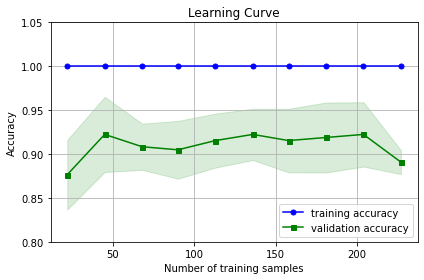

In [18]:
# Learning curve Accuracy based on sample data
train_sizes, train_scores, test_scores = learning_curve(estimator=decision_tree, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

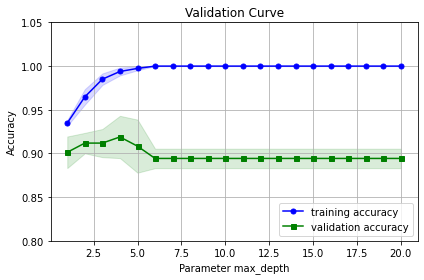

In [19]:
# Validation Curve
param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
train_scores, test_scores = validation_curve(estimator=decision_tree, X=X_train, y=y_train, param_name='max_depth',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()



In [20]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [21]:
# Hyperparameter Tuning
param_range1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

param_grid = [{'max_depth': param_range1}]

gs = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 1.043
Best Score: 0.919
Best Parameter: {'max_depth': 4}


In [22]:
# Verifying Optimal Model
best_tree = gs.best_estimator_
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [23]:
# Predicting with the verification data
y_pred = best_tree.predict(X_test)

In [24]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],177,2
True[1],17,89


In [25]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       179
           1       0.98      0.84      0.90       106

    accuracy                           0.93       285
   macro avg       0.95      0.91      0.93       285
weighted avg       0.94      0.93      0.93       285



In [26]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 19
Accuracy: 0.933
Precision: 0.978
Recall: 0.840
F1: 0.904


In [27]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])

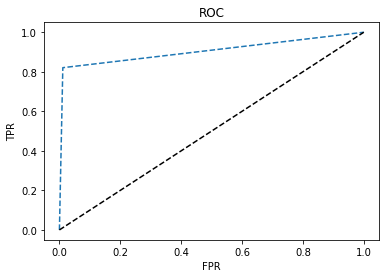

In [28]:
# Graph ROC curve based on f1 score
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [29]:
# Cross Validation
scores = cross_validate(estimator=best_tree, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.919 +/- 0.024


## 4. Neural Network

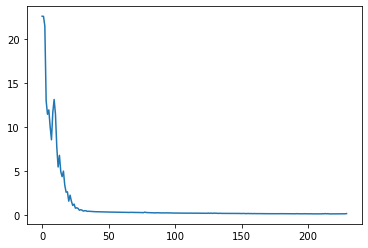

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)
#plt.plot(mlp.validation_scores_)

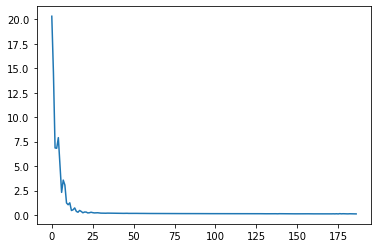

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [83]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=1)

In [84]:
y_pred = mlp.predict(X_test)

In [85]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],169,10
True[1],13,93


In [86]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       179
           1       0.90      0.88      0.89       106

    accuracy                           0.92       285
   macro avg       0.92      0.91      0.91       285
weighted avg       0.92      0.92      0.92       285



In [87]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 23
Accuracy: 0.919
Precision: 0.903
Recall: 0.877
F1: 0.890


In [88]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])

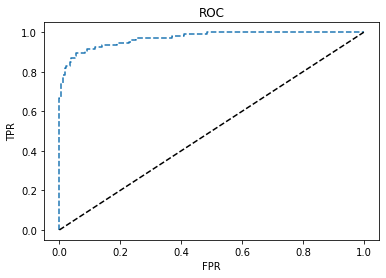

In [89]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [90]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.905 +/- 0.049


In [91]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

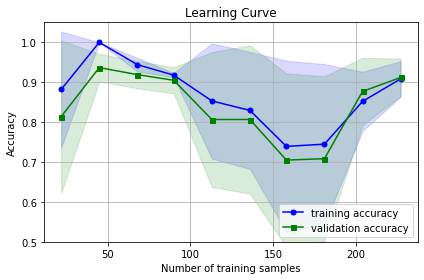

In [92]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

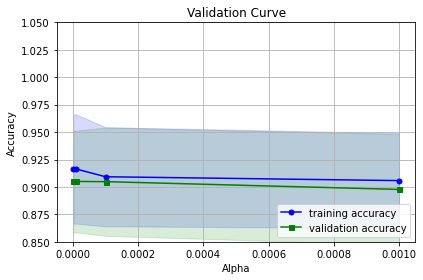

In [93]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [95]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 2.852
Best Score: 0.947
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (10, 5)}


In [73]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(10, 5), max_iter=1000,
              random_state=1)

In [74]:
# Predicting with the verification data
y_pred = best_mlp.predict(X_test)

In [75]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],171,8
True[1],13,93


In [76]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       179
           1       0.92      0.88      0.90       106

    accuracy                           0.93       285
   macro avg       0.93      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



In [77]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 21
Accuracy: 0.926
Precision: 0.921
Recall: 0.877
F1: 0.899


In [78]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])

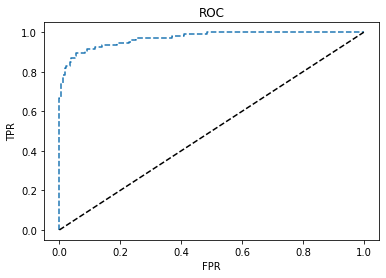

In [79]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [80]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.947 +/- 0.022


## 5. Support Vector Machine

In [48]:
svm = SVC(kernel='linear', random_state=1, probability = True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [49]:
y_pred = svm.predict(X_test)

In [50]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],137,6
True[1],7,78


In [51]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       143
           1       0.93      0.92      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228



In [52]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 13
Accuracy: 0.943
Precision: 0.929
Recall: 0.918
F1: 0.923


In [53]:
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

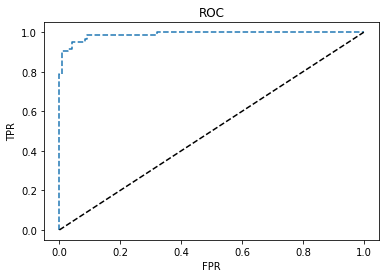

In [54]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [55]:
# Cross Validation
scores = cross_validate(estimator=svm, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.933 +/- 0.019


In [56]:
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

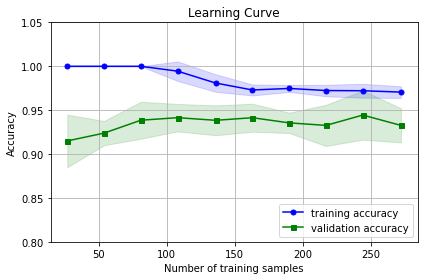

In [57]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

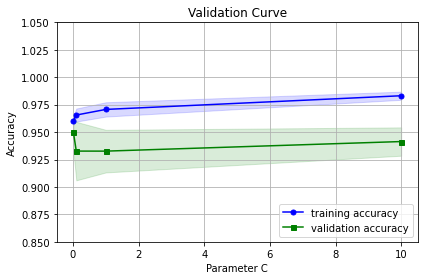

In [58]:
# Validation Curve

param_range=[0.01,0.1,1.0,10]

train_scores, test_scores = validation_curve(estimator=svm, X=X_train, y=y_train, param_name='C',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [59]:
# Hyperparameter Tuning
param_range=[0.01,0.1,1.0,10]

param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=svm, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 8.033
Best Score: 0.950
Best Parameter: {'C': 0.01}


In [60]:
# Verifying Optimal Model
best_svm = gs.best_estimator_
best_svm.fit(X_train, y_train)

SVC(C=0.01, kernel='linear', probability=True, random_state=1)

In [61]:
# Predicting with the verification data
y_pred = best_svm.predict(X_test)

In [62]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],136,7
True[1],8,77


In [63]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       143
           1       0.92      0.91      0.91        85

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



In [64]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 15
Accuracy: 0.934
Precision: 0.917
Recall: 0.906
F1: 0.911


In [65]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

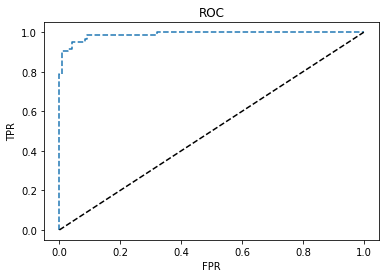

In [66]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [67]:
# Cross Validation
scores = cross_validate(estimator=best_svm, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.950 +/- 0.018


In [68]:
svm2 = SVC(kernel='rbf', random_state=1, probability = True)
svm2.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [69]:
y_pred = svm2.predict(X_test)

In [70]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],140,3
True[1],19,66


In [71]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       143
           1       0.96      0.78      0.86        85

    accuracy                           0.90       228
   macro avg       0.92      0.88      0.89       228
weighted avg       0.91      0.90      0.90       228



In [72]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 22
Accuracy: 0.904
Precision: 0.957
Recall: 0.776
F1: 0.857


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

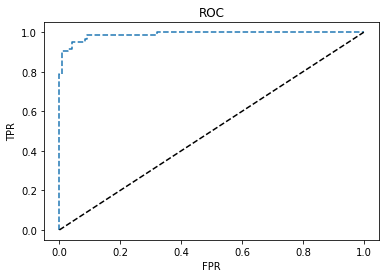

In [74]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [75]:
# Cross Validation
scores = cross_validate(estimator=svm2, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.912 +/- 0.020


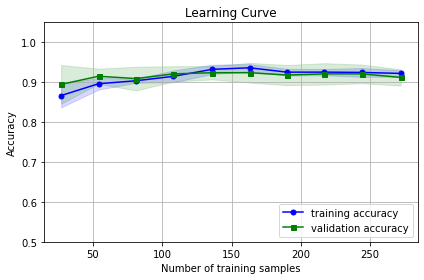

In [76]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm2, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

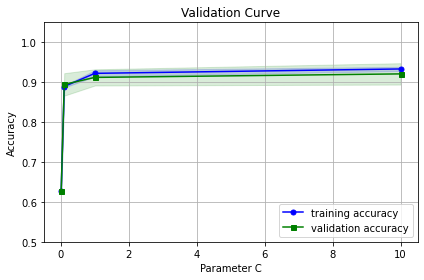

In [77]:
# Validation Curve

param_range=[0.01,0.1,1.0,10]

train_scores, test_scores = validation_curve(estimator=svm2, X=X_train, y=y_train, param_name='C',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

In [78]:
# Hyperparameter Tuning
param_range=[0.01,0.1,1.0,10]

param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=svm2, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 0.056
Best Score: 0.921
Best Parameter: {'C': 10}


In [79]:
# Verifying Optimal Model
best_svm2 = gs.best_estimator_
best_svm2.fit(X_train, y_train)

SVC(C=10, probability=True, random_state=1)

In [80]:
# Predicting with the verification data
y_pred = best_svm2.predict(X_test)

In [81]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],140,3
True[1],16,69


In [82]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       143
           1       0.96      0.81      0.88        85

    accuracy                           0.92       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.92      0.92      0.92       228



In [83]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 19
Accuracy: 0.917
Precision: 0.958
Recall: 0.812
F1: 0.879


In [84]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])

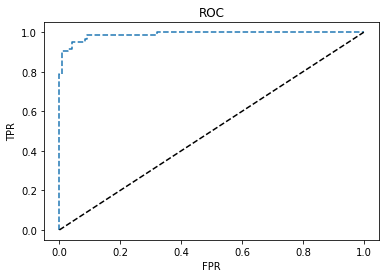

In [85]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [86]:
# Cross Validation
scores = cross_validate(estimator=best_svm2, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.921 +/- 0.027


## 6. AdaBoosting

In [87]:
boost_tree = DecisionTreeClassifier(max_depth=1, criterion='gini',random_state=1)
adaboost = AdaBoostClassifier(base_estimator=boost_tree, random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   random_state=1)

In [88]:
y_pred = adaboost.predict(X_test)

In [89]:
# Confusion matrix qualification
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],138,5
True[1],9,76


In [90]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       143
           1       0.94      0.89      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228



In [91]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 14
Accuracy: 0.939
Precision: 0.938
Recall: 0.894
F1: 0.916


In [92]:
fpr, tpr, thresholds = roc_curve(y_test, adaboost.predict_proba(X_test)[:, 1])

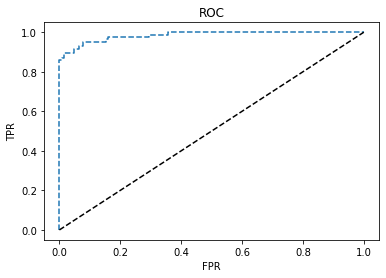

In [93]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [94]:
# Cross Validation
scores = cross_validate(estimator=adaboost, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.959 +/- 0.024


In [95]:
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': 1,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

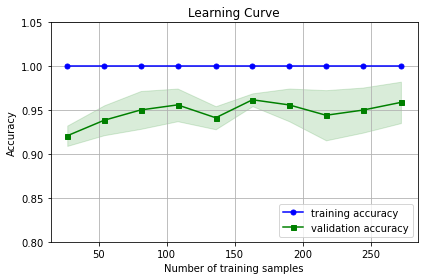

In [96]:
# Learning curve Accuracy based on sample data
train_sizes, train_scores, test_scores = learning_curve(estimator=adaboost, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

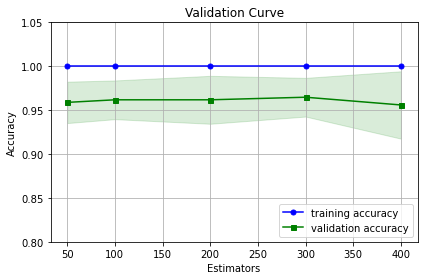

In [97]:
# Validation Curve

param_range=[50,100,200,300,400]

train_scores, test_scores = validation_curve(estimator=adaboost, X=X_train, y=y_train, param_name='n_estimators',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

In [98]:
# Hyperparameter Tuning
param_range1=[50, 100, 200, 300, 400, 500]
param_range2=[1, 2, 3, 4, 5]
param_grid = [{'n_estimators': param_range1}]

gs = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 2.562
Best Score: 0.965
Best Parameter: {'n_estimators': 300}


In [99]:
# Verifying Optimal Model
best_adaboost = gs.best_estimator_
best_adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   n_estimators=300, random_state=1)

In [100]:
# Predicting with the verification data
y_pred = best_adaboost.predict(X_test)

In [101]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],142,1
True[1],9,76


In [102]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       143
           1       0.99      0.89      0.94        85

    accuracy                           0.96       228
   macro avg       0.96      0.94      0.95       228
weighted avg       0.96      0.96      0.96       228



In [103]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 10
Accuracy: 0.956
Precision: 0.987
Recall: 0.894
F1: 0.938


In [104]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost.predict_proba(X_test)[:, 1])

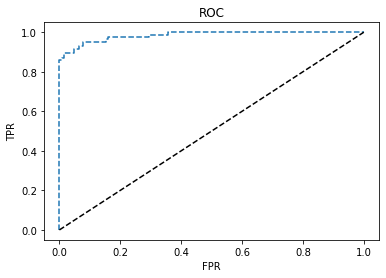

In [105]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [106]:
# Cross Validation
scores = cross_validate(estimator=best_adaboost, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.965 +/- 0.022


## 7. KNN

In [107]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [108]:
y_pred = knn.predict(X_test)

In [109]:
# Confusion matrix qualification
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],137,6
True[1],10,75


In [110]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       143
           1       0.93      0.88      0.90        85

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [111]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 16
Accuracy: 0.930
Precision: 0.926
Recall: 0.882
F1: 0.904


In [112]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

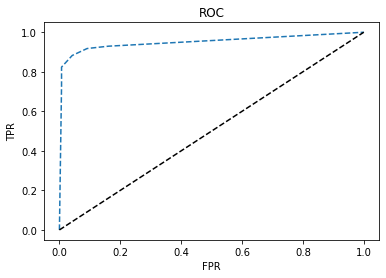

In [113]:
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [114]:
# Cross Validation
scores = cross_validate(estimator=knn, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.912 +/- 0.035


In [115]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

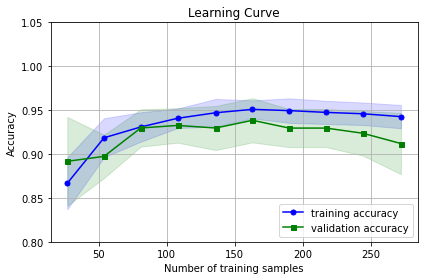

In [116]:
# Learning curve Accuracy based on sample data
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

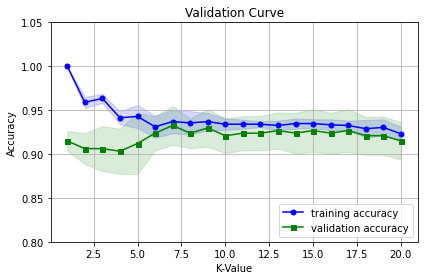

In [117]:
# Validation Curve

param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

train_scores, test_scores = validation_curve(estimator=knn, X=X_train, y=y_train, param_name='n_neighbors',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

In [118]:
# Hyperparameter Tuning
param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = [{'n_neighbors': param_range}]

gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 0.128
Best Score: 0.933
Best Parameter: {'n_neighbors': 7}


In [119]:
# Verifying Optimal Model
best_knn = gs.best_estimator_
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [120]:
# Confusion matrix qualification
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],137,6
True[1],10,75


In [121]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       143
           1       0.93      0.88      0.90        85

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [122]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 16
Accuracy: 0.930
Precision: 0.926
Recall: 0.882
F1: 0.904


In [123]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

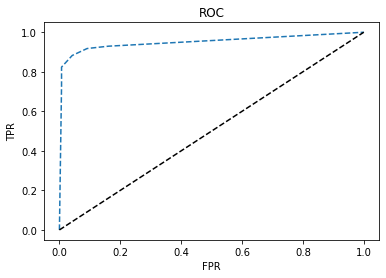

In [124]:
plt.plot(fpr, tpr, '--', label="Support Vector Machine")
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.plot([fpr],[tpr],'r-',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [125]:
# Cross Validation
scores = cross_validate(estimator=best_knn, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.933 +/- 0.022
